In [1]:
from sklearn.model_selection import train_test_split
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
import os.path
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [2]:
plot_predictions = False

data_path = 'data'
categories = ['a', 'b', 'l', 'p', 'o', 'k', 's']

data = []
labels = []

In [3]:
for category in categories:
    category_path = os.path.join(data_path, category)
    class_num = categories.index(category)
    for img in os.listdir(category_path):
        try:
            img_path = os.path.join(category_path, img)
            img_array = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            data.append(img_array)
            labels.append(class_num)
        except Exception as e:
            pass

data = np.array(data) / 255.0
data = np.reshape(data, (data.shape[0], 16, 16, 1))
labels = np.array(labels)

In [4]:
def save_model(model):
    model.save('model.h5')

In [5]:
def load_model():
    if os.path.isfile('model.h5'):
        model = tf.keras.models.load_model('model.h5')
        return model, True

    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(16, 16, 1)),
        MaxPooling2D(2, 2),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D(2, 2),
        Flatten(),
        Dense(64, activation='relu'),
        Dense(len(categories), activation='softmax')
    ])

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    return model, False

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    data, labels, test_size=0.1)

model, loaded = load_model()

if not loaded:
    model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test))

    save_model(model)

predictions = model.predict(X_test)

predicted_labels = np.argmax(predictions, axis=1)

predicted_labels = np.argmax(predictions, axis=1)




1/1 [==============================] - 0s 72ms/step


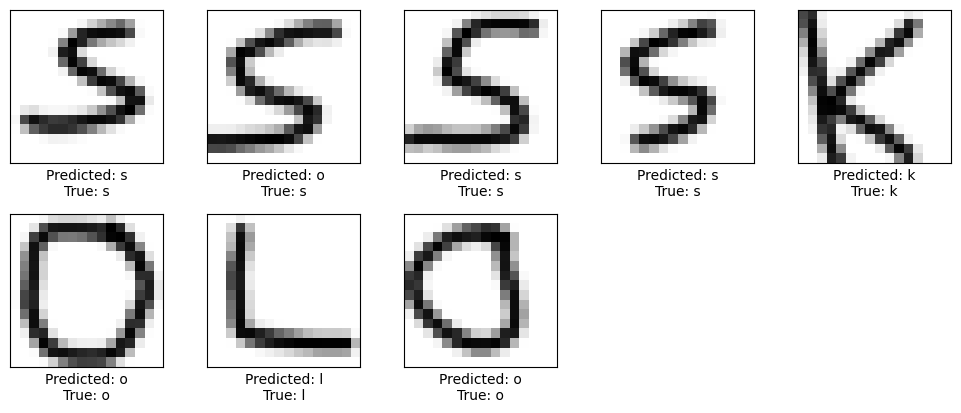

Accuracy: 0.875


In [7]:
plot_predictions = True

if plot_predictions:
    plt.figure(figsize=(10, 10))
    accuracy = 0

    for i in range(len(X_test)):
        plt.subplot(5, 5, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(X_test[i].reshape(16, 16), cmap='gray')
        plt.xlabel(
            f"Predicted: {categories[predicted_labels[i]]}\nTrue: {categories[y_test[i]]}")
        if predicted_labels[i] == y_test[i]:
            accuracy += 1

    plt.tight_layout()

    plt.show()

    print(f"Accuracy: {accuracy/len(X_test)}")

Number of contours found: 4


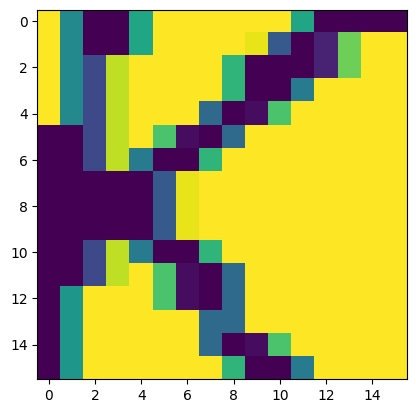

1/1 [==============================] - 0s 18ms/step
[[0. 0. 0. 0. 0. 1. 0.]]
k


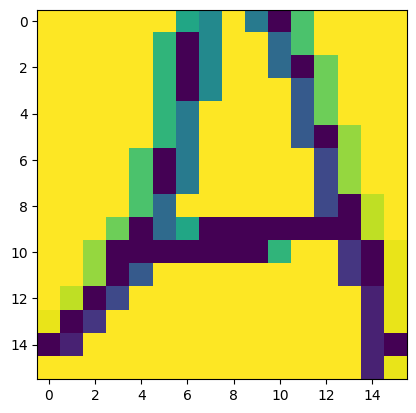

1/1 [==============================] - 0s 14ms/step
[[1. 0. 0. 0. 0. 0. 0.]]
a


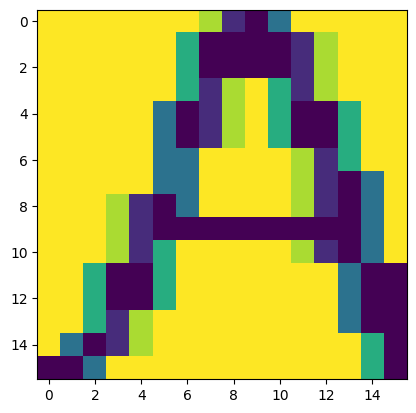

1/1 [==============================] - 0s 15ms/step
[[1. 0. 0. 0. 0. 0. 0.]]
a


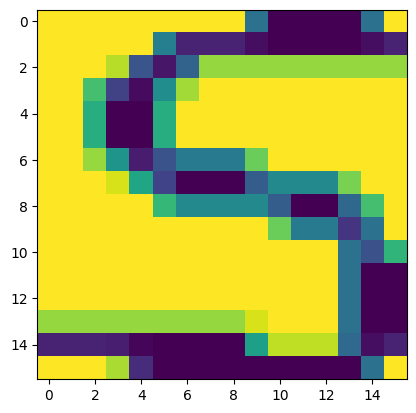

1/1 [==============================] - 0s 15ms/step
[[0.0000000e+00 0.0000000e+00 0.0000000e+00 2.3033032e-05 0.0000000e+00
  0.0000000e+00 9.9997699e-01]]
s


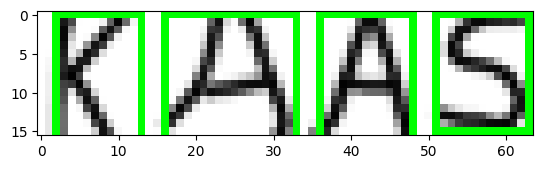

Word: kaas


In [12]:
word_img_path = 'data/word.png'

image = cv2.imread(word_img_path)

gray = cv2.cvtColor(src=image, code=cv2.COLOR_BGR2GRAY)

ret, im = cv2.threshold(gray, 100, 255, cv2.THRESH_BINARY_INV)

contours, hierarchy = cv2.findContours(
    im, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

print(f"Number of contours found: {len(contours)}")

letter_boxes = []

for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    if w > 1 and h > 1:
        letter_boxes.append((x, y, w, h))

letter_boxes = sorted(letter_boxes, key=lambda x: x[0])

image_with_boxes = image.copy()

image_with_boxes = cv2.cvtColor(image_with_boxes, cv2.COLOR_BGR2RGB)

predictions = []
word = ""

for i, letter_boxes in enumerate(letter_boxes):
    x, y, w, h = letter_boxes
    letter_image = im[y:y+h, x:x+w]

    letter_image = cv2.bitwise_not(letter_image)

    letter_image = cv2.resize(letter_image, (16, 16))

    # plt.imshow(letter_image)
    # plt.show()

    letter_image = np.reshape(letter_image, (1, 16, 16, 1))

    prediction = model.predict(letter_image)
    print(prediction)
    predicted_label = np.argmax(prediction, axis=1)

    cv2.rectangle(image_with_boxes, (x, y), (x+w, y+h), (0, 255, 0), 1)

    print(categories[predicted_label[0]])
    word += categories[predicted_label[0]]

plt.imshow(image_with_boxes)
plt.show()

print(f"Word: {word}")

1/1 [==============================] - 0s 14ms/step


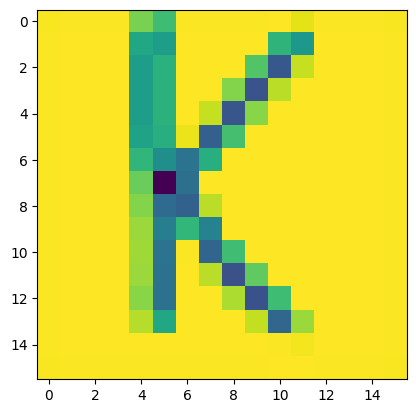

In [26]:
# # let user write a word and predict it
# import tkinter as tk
# from PIL import ImageGrab, Image, ImageOps

# THICKNESS = 15


# def on_mouse_move(event):
#     x, y = event.x, event.y
#     canvas.create_oval(x, y, x+THICKNESS, y+THICKNESS, fill='black')


# def on_mouse_release(event):
#     x, y = event.x, event.y
#     canvas.create_oval(x, y, x+THICKNESS, y+THICKNESS, fill='black')


# def on_clear():
#     label.config(text="")
#     canvas.delete('all')


# def on_predict():
#     # Grab the image from the canvas
#     x = root.winfo_rootx()+canvas.winfo_x()
#     y = root.winfo_rooty()+canvas.winfo_y()
#     x1 = x+canvas.winfo_width()
#     y1 = y+canvas.winfo_height()
#     img = ImageGrab.grab().crop((x, y, x1, y1))

#     img = img.convert("L")
#     img = ImageOps.invert(img)
#     img = img.resize((16, 16))

#     img = np.array(img)
#     img = np.reshape(img, (1, 16, 16, 1))
#     img = 1 - img / 255.0

#     plt.imshow(img.reshape(16, 16))

#     prediction = model.predict(img)
#     predicted_label = np.argmax(prediction, axis=1)

#     predicted_letter = categories[predicted_label[0]]
#     probability = prediction[0][predicted_label[0]]

#     label.config(text=f"Predicted: {predicted_letter} ({probability:.2f})")


# root = tk.Tk()
# root.title("Write a letter")

# canvas = tk.Canvas(root, width=400, height=400, bg='white')
# canvas.pack()

# canvas.bind('<B1-Motion>', on_mouse_move)
# canvas.bind('<ButtonRelease-1>', on_mouse_release)

# clear_button = tk.Button(root, text="Clear", command=on_clear)
# clear_button.pack()

# predict_button = tk.Button(root, text="Predict", command=on_predict)
# predict_button.pack()

# label = tk.Label(root, text="")
# label.pack()

# root.mainloop()

In [31]:
import tkinter as tk
from PIL import ImageGrab, Image, ImageOps

def add_image_to_dataset(img, label):
    letter = label
    number = 0
    while os.path.isfile(f"data/{letter}/{number}.png"):
        number += 1

    cv2.imwrite(f"data/{letter}/{number}.png", img)

    print(f"Added image to dataset: {letter}/{number}.png")

def on_add_to_dataset():
    # Grab the image from the canvas
    x = root.winfo_rootx()+canvas.winfo_x()
    y = root.winfo_rooty()+canvas.winfo_y()
    x1 = x+canvas.winfo_width()
    y1 = y+canvas.winfo_height()
    img = ImageGrab.grab().crop((x, y, x1, y1))

    img = img.convert("L")
    img = img.resize((16, 16))

    img = np.array(img)

    add_image_to_dataset(img, label.get())

def on_clear():
    label.config(text="")
    canvas.delete('all')

THICKNESS = 25

def on_mouse_move(event):
    x, y = event.x, event.y
    canvas.create_oval(x, y, x+THICKNESS, y+THICKNESS, fill='black')

def on_mouse_release(event):
    x, y = event.x, event.y
    canvas.create_oval(x, y, x+THICKNESS, y+THICKNESS, fill='black')

root = tk.Tk()
root.title("Add to dataset")

canvas = tk.Canvas(root, width=400, height=400, bg='white')
canvas.pack()

canvas.bind('<B1-Motion>', on_mouse_move)
canvas.bind('<ButtonRelease-1>', on_mouse_release)

label = tk.Entry(root)
label.pack()

add_button = tk.Button(root, text="Add to dataset", command=on_add_to_dataset)
add_button.pack()

clear_button = tk.Button(root, text="Clear", command=on_clear)
clear_button.pack()

root.mainloop()


Added image to dataset: k/0.png
Added image to dataset: o/0.png
Added image to dataset: o/15.png
Added image to dataset: o/16.png
Added image to dataset: c/0.png
Added image to dataset: c/0.png
Added image to dataset: c/0.png
Added image to dataset: c/0.png
Added image to dataset: c/1.png
Added image to dataset: c/2.png
Added image to dataset: c/3.png
Added image to dataset: c/4.png
Added image to dataset: c/5.png
Added image to dataset: c/6.png
Added image to dataset: c/7.png
Added image to dataset: c/8.png
Added image to dataset: c/9.png
Added image to dataset: c/10.png
Added image to dataset: a/0.png
Added image to dataset: a/11.png
Added image to dataset: a/12.png
Added image to dataset: a/13.png
Added image to dataset: a/14.png
Added image to dataset: a/15.png
Added image to dataset: a/16.png
Added image to dataset: a/17.png
Added image to dataset: a/18.png
Added image to dataset: a/19.png
Added image to dataset: a/20.png
